1. Data Loading + Scope Application (Required)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("retail_store_inventory.csv")

# Scope 적용
df = df[(df["Region"] == "North") & (df["Category"] == "Groceries")]

2. Examine the Target Variable

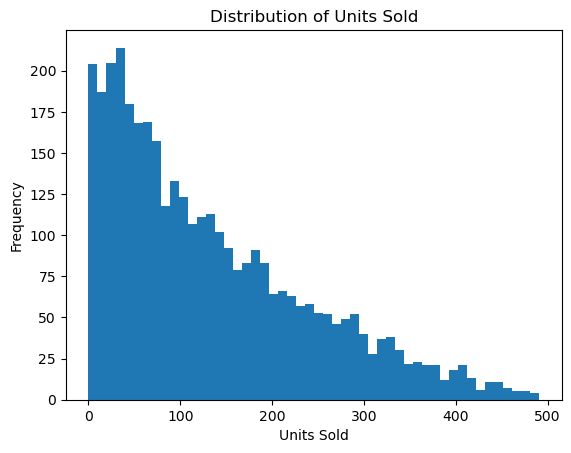

In [2]:
# 2-1. View the distribution (Histogram)
plt.hist(df["Units Sold"], bins=50)
plt.title("Distribution of Units Sold")
plt.xlabel("Units Sold")
plt.ylabel("Frequency")
plt.show()

Units Sold shows a right-skewed distribution, indicating that most days have moderate sales while a small number of days experience very high demand.

판매량은 오른쪽으로 치우친 분포를 보이며, 대부분의 날은 중간 수준의 판매량을 기록하지만 일부 날에는 매우 높은 수요가 발생한다.

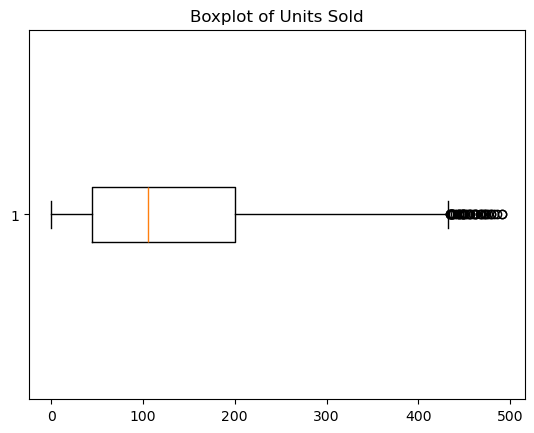

In [3]:
# 2-2. Identify outliers (Boxplot)
plt.boxplot(df["Units Sold"], vert=False)
plt.title("Boxplot of Units Sold")
plt.show()

The boxplot reveals the presence of extreme high sales values, which likely represent real demand spikes rather than data errors.

박스플롯을 통해 일부 매우 높은 판매량 값이 확인되었으며, 이는 데이터 오류라기보다는 실제 수요 급증을 반영한 것으로 보인다.

In [ ]:
3. Compare each feature with the target variable

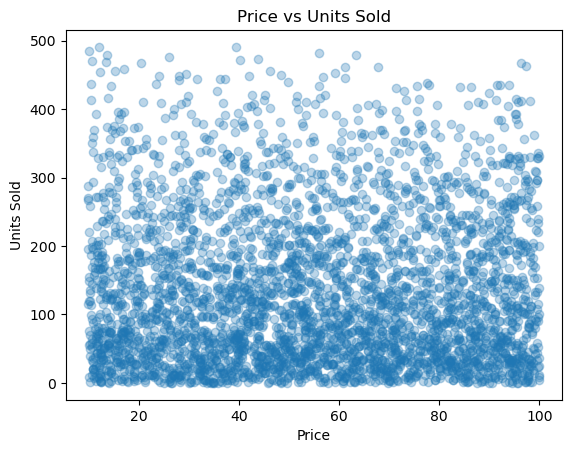

In [8]:
# 3-1. Price vs. Units Sold

plt.scatter(df["Price"], df["Units Sold"], alpha=0.3)
plt.xlabel("Price")
plt.ylabel("Units Sold")
plt.title("Price vs Units Sold")
plt.show()

The scatter plot suggests a weak negative relationship between price and units sold, indicating that higher prices tend to be associated with lower sales, although the pattern is not strictly linear.

산점도에서는 가격이 높을수록 판매량이 감소하는 경향이 약하게 관찰되지만, 그 관계가 뚜렷한 선형 형태는 아니다.

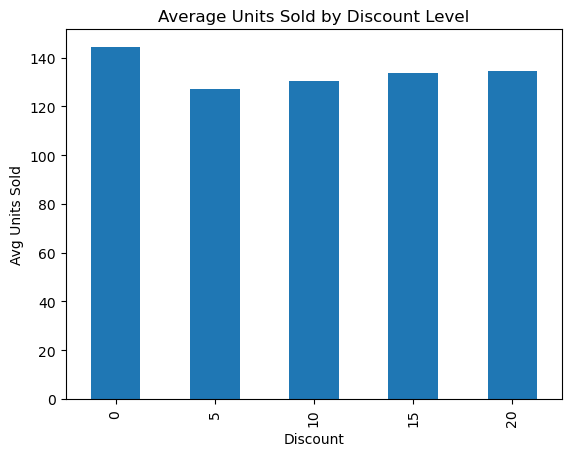

In [5]:
# 3-2. Discount effect

df.groupby("Discount")["Units Sold"].mean().plot(kind="bar")
plt.title("Average Units Sold by Discount Level")
plt.ylabel("Avg Units Sold")
plt.show()

Average units sold generally increase as the discount level increases, suggesting that promotional discounts have a positive impact on demand.

할인율이 높아질수록 평균 판매량이 전반적으로 증가하는 경향을 보여, 프로모션 할인이 수요 증가에 긍정적인 영향을 미침을 시사한다.

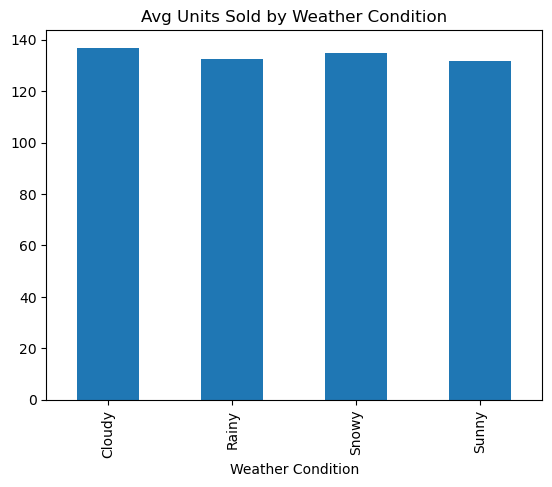

In [6]:
# 3-3. Weather / Holiday / Seasonality (Categorical variables)

df.groupby("Weather Condition")["Units Sold"].mean().plot(kind="bar")
plt.title("Avg Units Sold by Weather Condition")
plt.show()

Average sales vary slightly across weather conditions, indicating that weather may influence demand, although its effect appears relatively modest.

날씨 조건에 따라 평균 판매량에 약간의 차이가 나타나며, 날씨가 수요에 영향을 미치기는 하지만 그 영향은 비교적 크지 않은 것으로 보인다.

4. Checking time patterns

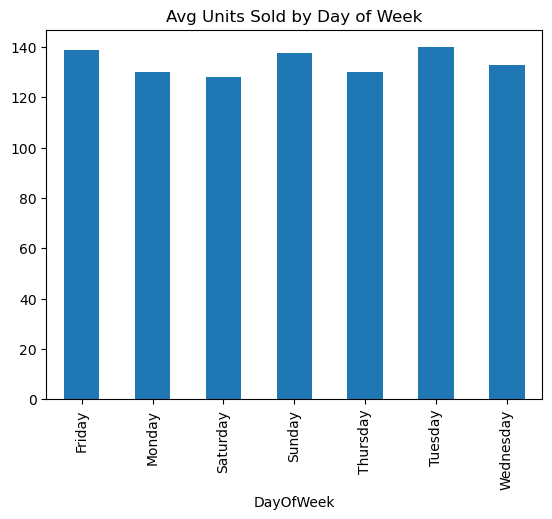

In [7]:
# 4-1. Day of the week effect
df["Date"] = pd.to_datetime(df["Date"])
df["DayOfWeek"] = df["Date"].dt.day_name()

df.groupby("DayOfWeek")["Units Sold"].mean().plot(kind="bar")
plt.title("Avg Units Sold by Day of Week")
plt.show()

Sales exhibit noticeable variation by day of the week, suggesting the presence of weekly demand patterns that are relevant for inventory planning.

요일별 평균 판매량에 차이가 나타나며, 이는 재고 계획에 활용할 수 있는 주간 수요 패턴이 존재함을 의미한다.

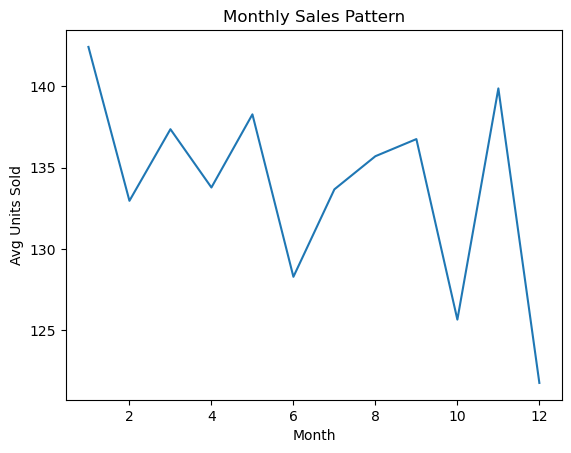

In [9]:
# 4-2. Monthly / Seasonal effects

df["Month"] = df["Date"].dt.month

df.groupby("Month")["Units Sold"].mean().plot()
plt.title("Monthly Sales Pattern")
plt.ylabel("Avg Units Sold")
plt.show()

Monthly average sales fluctuate over the year, indicating seasonal demand patterns that should be captured by temporal features in the model.

월별 평균 판매량은 연중 변동을 보이며, 이는 모델에 시간적 특성을 반영해야 할 계절적 수요 패턴이 존재함을 보여준다.

Overall, the EDA results indicate that pricing, promotions, and temporal factors are meaningful drivers of demand and should be included in the demand forecasting model.

종합적으로 EDA 결과는 가격, 프로모션, 시간적 요인이 수요를 설명하는 중요한 변수임을 보여주며, 이들은 수요 예측 모델에 포함될 필요가 있다.